11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28, 1) (60000, 10)
Test shape: (10000, 28, 28, 1) (10000, 10)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,611,466 (6.15 MB)

 Trainable params: 1,611,466 (6.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9061 - loss: 0.3037 - val_accuracy: 0.9794 - val_loss: 0.0675
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9845 - loss: 0.0501 - val_accuracy: 0.9831 - val_loss: 0.0539
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 43ms/step - accuracy: 0.9917 - loss: 0.0262 - val_accuracy: 0.9841 - val_loss: 0.0544
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.9936 - loss: 0.0181 - val_accuracy: 0.9848 - val_loss: 0.0561
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9956 - loss: 0.0130 - val_accuracy: 0.9861 - val_loss: 0.0507
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 36ms/step - accuracy: 0.9969 - loss: 0.0085 - val_accuracy: 0.9892 - val_loss: 0.0425
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 30ms/step - accuracy: 0.9972 - loss: 0.0083 - val_accuracy: 0.9877 - val_loss: 0.0522
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9988 -

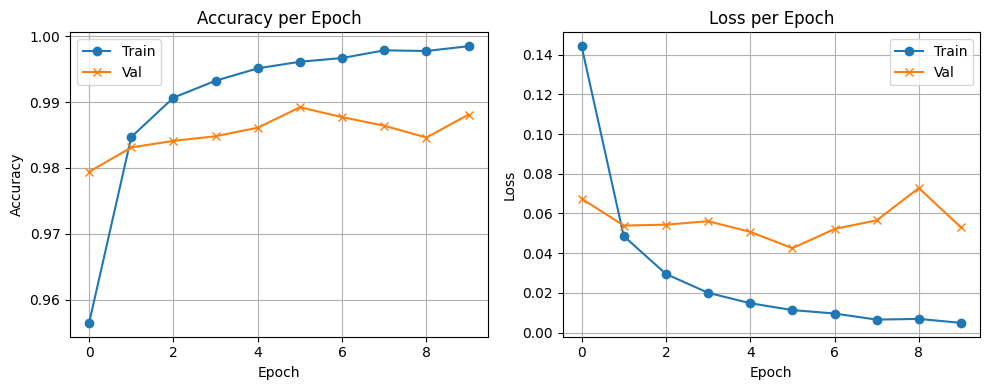

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


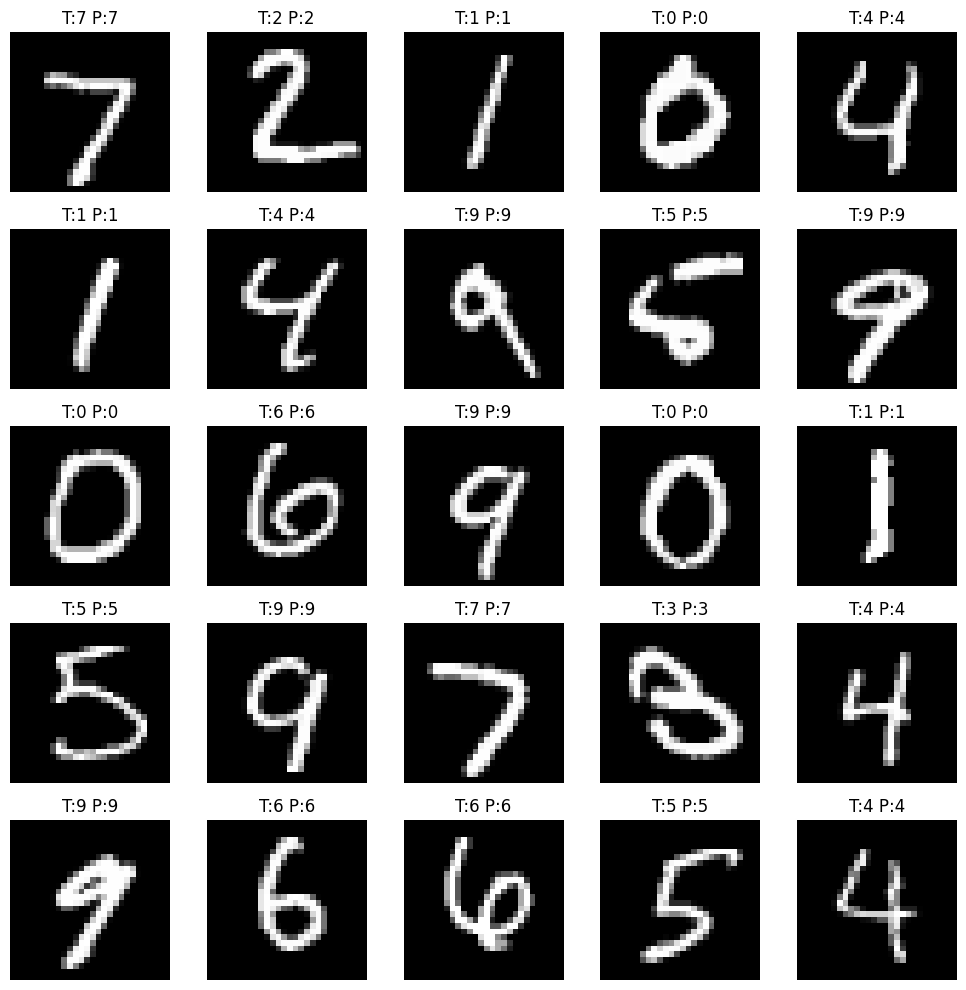

In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

def main():
    (trainX, trainY), (testX, testY) = mnist.load_data()

    # ✅ add channel dimension
    trainX = (trainX.astype('float32') / 255.0)[..., np.newaxis]  # (N,28,28,1)
    testX  = (testX.astype('float32')  / 255.0)[..., np.newaxis]

    trainY_cat = to_categorical(trainY, num_classes=10)
    testY_cat  = to_categorical(testY,  num_classes=10)

    print("Train shape:", trainX.shape, trainY_cat.shape)
    print("Test shape:",  testX.shape,  testY_cat.shape)

    model = build_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(trainX, trainY_cat, epochs=10, batch_size=32,
                        validation_data=(testX, testY_cat))

    loss, accuracy = model.evaluate(testX, testY_cat, verbose=0)
    print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

    # ✅ make one figure for both curves (no show inside helpers)
    fig = plt.figure(figsize=(10,4))
    plot_accuracy(history, subplot=(1,2,1))
    plot_loss(history, subplot=(1,2,2))
    plt.tight_layout()
    plt.show()

    # ✅ Predictions
    predictions = model.predict(testX)
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = testY

    plot_predictions(testX, actual_classes, predicted_classes)

def build_model():
    num_classes = 10
    img_size = (28,28,1)
    inputs = Input(img_size)
    x = Conv2D(8, (3,3), activation='relu', padding='same')(inputs)
    x = Conv2D(16, (3,3), activation='relu', padding='same')(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    # Some TF versions don't support show_trainable; this is safest:
    model.summary()
    return model

def plot_predictions(images, actual, predicted, num=25):
    plt.figure(figsize=(10,10))
    for i in range(num):
        plt.subplot(5, 5, i + 1)
        # ✅ squeeze because images are (28,28,1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"T:{actual[i]} P:{predicted[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def plot_accuracy(history, subplot=None):
    if subplot: plt.subplot(*subplot)
    plt.plot(history.history['accuracy'], label='Train', marker='o')
    plt.plot(history.history['val_accuracy'], label='Val', marker='x')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.grid(True); plt.legend()

def plot_loss(history, subplot=None):
    if subplot: plt.subplot(*subplot)
    plt.plot(history.history['loss'], label='Train', marker='o')
    plt.plot(history.history['val_loss'], label='Val', marker='x')
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.grid(True); plt.legend()

if __name__ == '__main__':
    main()
